# Data Preprocessing

Date: 3/23/25

Authors: Gurpreet Singh, Logan Sehr, Chinmaykumar Brahmbhatt


## Load Dataset

In [1]:
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

dataset_path = "/home/public/datasets/ships-in-satellite/shipsnet.json"

df = pd.read_json(dataset_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB
None


## Segement by Type

In [2]:
import os

IMAGES_PATH = os.getenv("IMAGES_PATH")
ROOT_DATA_PATH = os.getenv("ROOT_DATA_PATH")

def create_dir(path):
    if not os.path.exists(ROOT_DATA_PATH + path):
        os.makedirs(ROOT_DATA_PATH + path)

create_dir("formatted/train/ships")
create_dir("formatted/train/nonships")
create_dir("formatted/val/ships")
create_dir("formatted/val/nonships")
create_dir("formatted/test/ships")
create_dir("formatted/test/nonships")


In [ ]:
ships = []
nonships = []

images = os.listdir(IMAGES_PATH)

for image in images:
    category = int(image.split("__")[0])
    if category == 0:
        nonships.append(IMAGES_PATH + image)
    else:
        ships.append(IMAGES_PATH + image)

print(f"{len(ships)} ships")
print(f"{len(nonships)} non-ships")

1000 ships
3000 non-ships


## Dataset Class (PyTorch)

In [5]:
import torch
from torch.utils.data import Dataset
from PIL import Image

def load_image(path):
    return Image.open(path)

# Image data expected
class ShipsDataset(Dataset):
    def __init__(self, images: list, labels: list, transform=None):
        super().__init__()
        self.images = images
        self.labels = labels
        if transform:
            self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        sample = self.images[index]

        if self.transform:
            sample = self.transform(sample)
        
        return (sample, self.label[index])

In [6]:
ships_images = [load_image(ship) for ship in ships]
nonships_images = [load_image(nonship) for nonship in nonships]

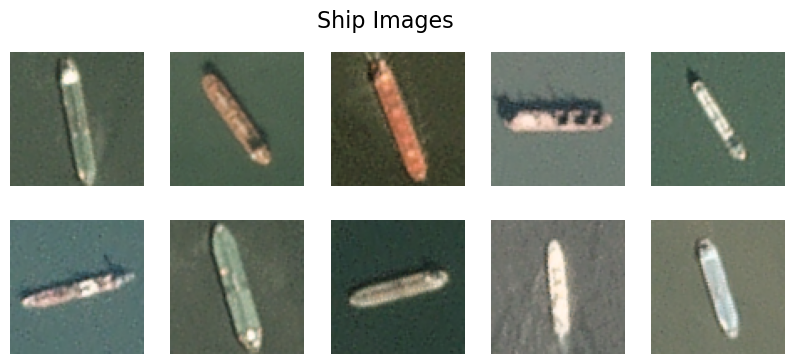

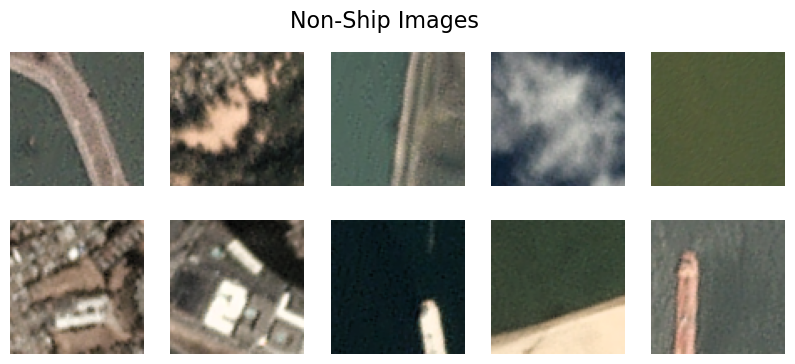

In [17]:
import matplotlib.pyplot as plt
import numpy as np

rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 4))
fig.suptitle("Ship Images", fontsize=16)
axes = axes.flatten()

for i, (img, ax) in enumerate(zip(ships_images[:10], axes)):
    ax.imshow(np.array(img))
    ax.axis("off")

fig, axes = plt.subplots(rows, cols, figsize=(10, 4))
fig.suptitle("Non-Ship Images", fontsize=16)
axes = axes.flatten()

for i, (img, ax) in enumerate(zip(nonships_images[:10], axes)):
    ax.imshow(np.array(img))
    ax.axis("off")


## Transformations (WIP)

In [ ]:
from torchvision.transforms import transforms
transform = torch.nn.Sequential([
    
])